In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
dataset = read_csv(r"D:\Python\Projects\2. Iris Dataset\Iris.csv")

In [8]:
dataset.shape

(150, 6)

In [19]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
dataset.drop( columns = 'Id', axis =1,inplace= True)

In [18]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
dataset.groupby('Species').size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

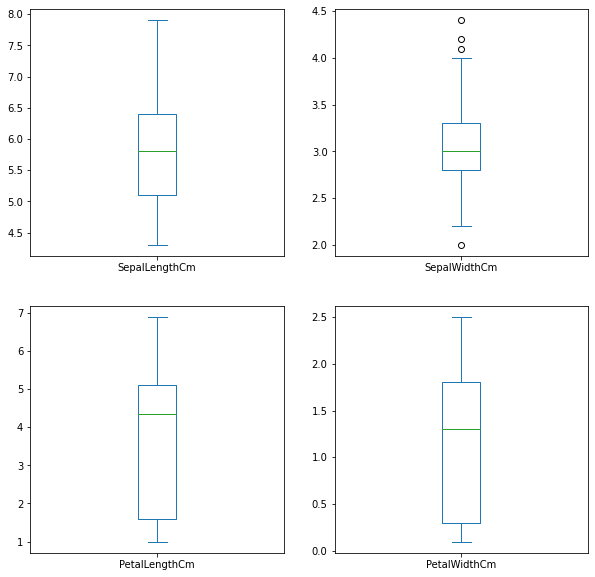

In [21]:
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (10,10))
pyplot.show()

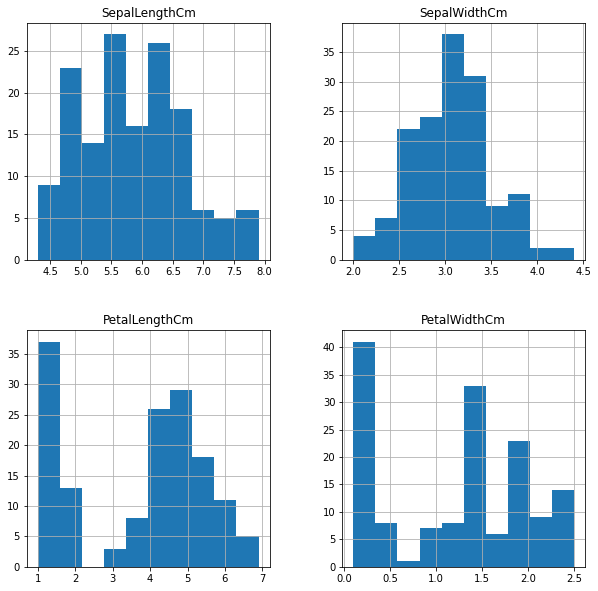

In [22]:
dataset.hist(figsize = (10,10))
pyplot.show()

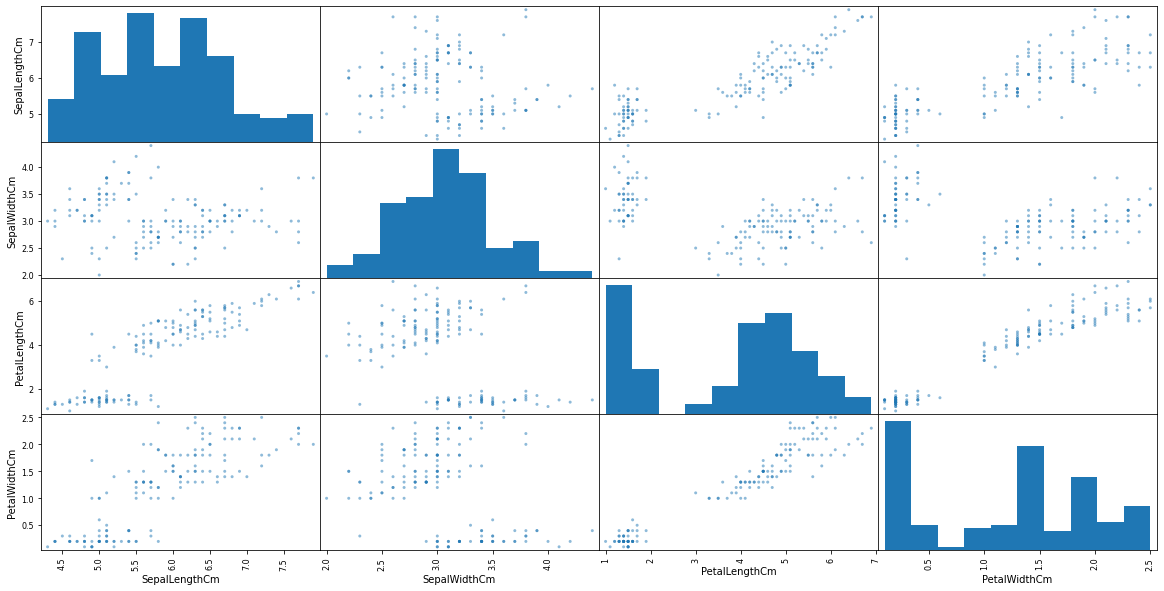

In [24]:
scatter_matrix(dataset, figsize = (20,10))
pyplot.show()

In [27]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.2
X_train,X_validation,Y_train, Y_validation = train_test_split(X,Y,test_size = validation_size,random_state = seed)

In [28]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits = 10, shuffle = True)
    cv_results = cross_val_score(model, X_train,Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\91996\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91996\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LR: 0.975000 (0.038188)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
NB: 0.975000 (0.038188)
SVM: 0.983333 (0.033333)


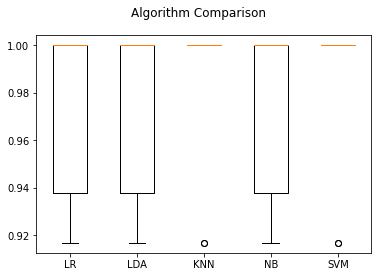

In [29]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [30]:
results

[array([1.        , 1.        , 1.        , 1.        , 0.91666667,
        1.        , 1.        , 1.        , 0.91666667, 0.91666667]),
 array([0.91666667, 1.        , 1.        , 0.91666667, 0.91666667,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 0.91666667, 1.        , 1.        ,
        1.        , 1.        , 0.91666667, 1.        , 1.        ]),
 array([0.91666667, 1.        , 0.91666667, 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 0.91666667,
        1.        , 1.        , 1.        , 0.91666667, 1.        ])]

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

